<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 4 Sprint 2*

# Sprint Challenge - Neural Network Foundations

Table of Problems

1. [Defining Neural Networks](#Q1)
2. [Simple Perceptron](#Q2)
    - Perceptron
    - Multilayer Perceptron
    - Analyze and Compare
4. [Keras MMP](#Q3)

<a id="Q1"></a>
## 1. Defining Neural Networks 

Write *your own* definitions for the following terms:

- **Neuron:**
A Neuron, or node, is an individual computational unit in a layer inside a neural network. It takes as inputs one or more values from the previous layer (if it's a hidden or output layer) multiplied by a weight. The output of the neuron is the sum of those weighted inputs passed through an activation function like Sigmoid, Softmax, or Relu.

- **Input Layer:**
The input layer is the first layer of neurons that takes external data as inputs. There is no activation for these neurons. The number of neurons in the input layer is determined by the number of features in the dataset. 

- **Hidden Layer:**
Hidden layers are where the magic of Neural Networks takes place. Hidden layers are made up of Neurons, the number of which is predetermined before training begins. These hidden neurons take the inputs from previous layers and outputs that activated weighted sum to the next layer. Hidden layers aren't directly accessible during the training process. The only way we can affect these layers and the neurons inside them is by tuning the weights during backpropagation, and by defining their characteristics during compilation.

- **Output Layer:**
The output layer is our target. It is the thing we are trying to predict. For regression problems, there is typically only one neuron in the output layer. For classification problems, the number of neurons represents the number of different classes in the target and the values in those neurons represents a probability the that node/class is the predicted class.

- **Activation Function:**
The activation function is the function that each neuron passes its inputed weighted sum to. The purpose of an activation function is three fold. First, you want to reduce the importance of any one feature by reducing the value of the weighted sum to a number between 1 and 0. Second, it reduces computational load in the same manner, as doing matrix multiplication between matrices with huge values can quickly become computationally expensive. Finally, it reduces linarity in the model to help the model generalize better.

### Explain how back propagation works as if you were explaining it to a five year-old. Use your own words, but feel free to reference external materials for this question. 

Back propagation is how a neural network learns how important some things are. Say you wanted to throw a perfect strike in baseball but you didn't even know how to throw a baseball! The things that make a good strike in baseball might not be easy to know. For example, the way you hold the baseball, how you stand, the motion that your arm and body makes, and how hard you throw it all have an impact on the outcome of your pitch. Back propagation is the process of seeing how good or bad your pitch is, and then making adjustments to your form to make your pitch better.

Say you throw a 100 pitches super hard but quickly discover you fall over every time. You're off balance, so the first thing to change is how you stand before the pitch. That is your first back propagation adjustment! After 100 more pitches you see you're throwing it all over the place because you're gripping the ball with your whole palm. The next adjustment is to change your grip.

After 10,000 pitches, the adjustments that you have make eventually get smaller and smaller. This is called **loss**, and once this loss reaches a certain point you should be regularly throwing perfect strikes!

### Remember our Simple Perceptron Class from Monday. In a simple prediction describe the process of making a prediction. How do you go from inputs to predicted output.

- **Architecture:** First you build the input layer. The number of neurons in the input layer should be the same as the number of features, minus your target feature, in your data set. In the case of a simple perceptron you have no hidden layers, so the next layer is your output layer. The output layer should have one neuron for regression problems. In the case of a classification problem, the number of neurons in the output layer should be equal to the number of classes in the target feature. Next, you intialize the weights to a random number. These numbers should be too big so as not to make your matrix multiplication to strenuous. Consider number similar to the number of input and output nodes. Finally, you implement the activation function that is applied to the output layer. For now we'll just say it's a sigmoid function.
- **Feed-Forward:** Once the architecture is built the next thing to do is feed the training data through the network. After this process you're left with an error value, which simplistically represents the difference between your network's output and the expected output.
- **Back Propagation:** This error value is then passed into a derivative of the activation function, which in this case is the sigmoid derivative. This derivative function makes changes to the weights according to the error.
- **Train Some More:** You repeat this feed-forward -> back propagation process, called an epoch, multiple times until the output of the loss function no longer changes with great significance. At this point your weights are ideally calibrated to make a prediction!
- **Test:** The last step is to push a hold out test set with known outputs through your network one time, with no back propagation, to determine the accuracy of the network. The metrics that are available are many, but let's just assume it's the mean absolute error.
- **Predict:** If the model's accuracy is acceptable, you can now pass in any data of the same dimensions to make a prediction using the feed-forward step! 




<a id="Q2"></a>
## 2. Simple Perceptron

In this question, you will build two neural networks using Tensorflow Keras. After you build these two models, compare the results of the model.

In [0]:
"""
Our Dataset
"""
import numpy as np

xx, yy = np.meshgrid(np.linspace(-3, 3, 50),
                     np.linspace(-3, 3, 50))
rng = np.random.RandomState(0)

"Use this X & y in the following 2 models"
X = rng.randn(300, 2)
y = np.array(np.logical_xor(X[:, 0] > 0, X[:, 1] > 0), 
             dtype=int)

In [4]:
X.shape, y.shape

((300, 2), (300,))

### Simple Perceptron
Construct a simple perceptron using Keras. You model should have 1 dense layer with a single neuron and a sigmoid activation function. Your model should be called `model1` and make sure to save the results of your fit statement to a variable called `h1`. 

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import numpy as np

In [22]:
model1 = Sequential()

model1.add(Dense(2, input_dim=2))
model1.add(Dense(1, activation='sigmoid'))

model1.compile(loss='mae', optimizer='adam', metrics=['accuracy'])

h1 = model1.fit(x=X,
                y=y,
                epochs=300,
                learning_rate=0.001
                )

Epoch 1/300
10/10 [==============================] - 0s 1ms/step - loss: 0.4967 - accuracy: 0.5333
Epoch 2/300
10/10 [==============================] - 0s 1ms/step - loss: 0.4961 - accuracy: 0.5267
Epoch 3/300
10/10 [==============================] - 0s 1ms/step - loss: 0.4947 - accuracy: 0.5233
Epoch 4/300
10/10 [==============================] - 0s 1ms/step - loss: 0.4935 - accuracy: 0.5233
Epoch 5/300
10/10 [==============================] - 0s 1ms/step - loss: 0.4958 - accuracy: 0.5167
Epoch 6/300
10/10 [==============================] - 0s 1ms/step - loss: 0.4948 - accuracy: 0.5100
Epoch 7/300
10/10 [==============================] - 0s 1ms/step - loss: 0.4938 - accuracy: 0.5033
Epoch 8/300
10/10 [==============================] - 0s 1ms/step - loss: 0.4955 - accuracy: 0.4967
Epoch 9/300
10/10 [==============================] - 0s 1ms/step - loss: 0.4924 - accuracy: 0.5000
Epoch 10/300
10/10 [==============================] - 0s 1ms/step - loss: 0.4941 - accuracy: 0.5033
Epoch 11/

### Multi-Layer Perceptron
Now construct a multi-layer perceptron using Keras. Here are some architecture suggestions: 
- 2 Hidden Layers
- 5-32 Neurons in the Hidden Layers
- Your pick of activation function and optimizer
- Incorporate the Callback function below into your model

Your model should be called `model2` and make sure to save the results of your fit statement to a variable called `h2`. You must also monitor the metric 'accuracy'.

In [0]:
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if(logs.get('accuracy') > .99999):   
            self.model.stop_training = True

In [20]:
model2 = Sequential()

model2.add(Dense(2, input_dim=2))
model2.add(Dense(16, activation='relu'))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(1, activation='relu'))

model2.compile(loss='msle', optimizer='adamax', metrics=['accuracy'])

h2 = model2.fit(x=X,
                y=y,
                epochs=500,
                learning_rate=0.0001,
                callbacks=[myCallback()]
                )

Epoch 1/500
10/10 [==============================] - 0s 2ms/step - loss: 0.2029 - accuracy: 0.5300
Epoch 2/500
10/10 [==============================] - 0s 1ms/step - loss: 0.1804 - accuracy: 0.5267
Epoch 3/500
10/10 [==============================] - 0s 1ms/step - loss: 0.1580 - accuracy: 0.5300
Epoch 4/500
10/10 [==============================] - 0s 1ms/step - loss: 0.1432 - accuracy: 0.5267
Epoch 5/500
10/10 [==============================] - 0s 1ms/step - loss: 0.1270 - accuracy: 0.5533
Epoch 6/500
10/10 [==============================] - 0s 1ms/step - loss: 0.1044 - accuracy: 0.5833
Epoch 7/500
10/10 [==============================] - 0s 1ms/step - loss: 0.0943 - accuracy: 0.6100
Epoch 8/500
10/10 [==============================] - 0s 2ms/step - loss: 0.0882 - accuracy: 0.6500
Epoch 9/500
10/10 [==============================] - 0s 2ms/step - loss: 0.0795 - accuracy: 0.6767
Epoch 10/500
10/10 [==============================] - 0s 1ms/step - loss: 0.0738 - accuracy: 0.7000
Epoch 11/

### Analyze and Compare

**Before you Start**: You will need to install an additional library for this next segment. Install the package `mlxtend` into the environment you are using for the sprint challenge.


The cells below generate decision boundary plots of your models (`model1` & `model2`). Review the plots.

In [23]:
!pip install mlxtend

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


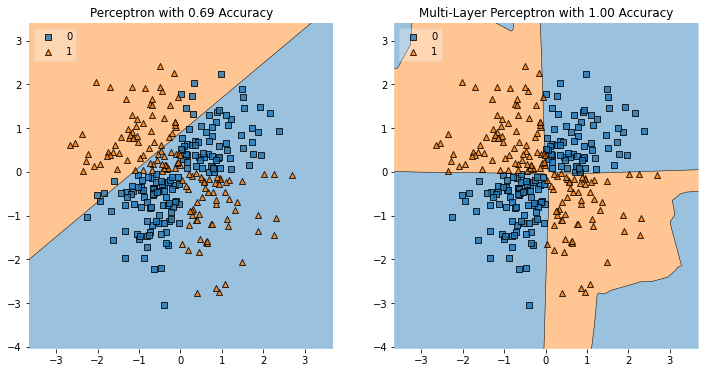

In [24]:
# Do Not change anything in this cell

import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

h = .02  # step size in the mesh

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - .2, X[:, 0].max() + .2
y_min, y_max = X[:, 1].min() - .2, X[:, 1].max() + .2
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

fig = plt.figure(figsize=(12,6))


for clf, hist, name, grd in zip([model1,model2], [h1, h2],['Perceptron', 'Multi-Layer Perceptron'],[1,2]):

    ax = plt.subplot(1,2, grd)
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    title = f"{name} with {hist.history['accuracy'][-1]:,.2f} Accuracy"
    plt.title(title)

plt.show()

Why does the Perceptron (`model1`) only achieve ~70% accuracy? What is the architectural property of the Multi-Layer Perceptron that allows it more accurately learn the relationship between X and y? 

Why might this property be useful in more complex data such as images?

Perceptron's are only single layered networks. The MLP's hidden layers allow it to add non-linearity to the input data that is magnitudes different than a single layered perceptron. Each layer can 'learn' different aspects of the data set that is impossible to do in a single layer.

If we were to take the MNIST data set as an example. The first hidden layer may generalize the edges of the numbers in the first layer, corners and loops in the second, and digit fragments in the third. These generalizations simply cannot be done in a single layer perceptron. Thus it stands to reason that the more complex or noisy the images in a dataset are, the more useful it is to have additional hidden layers to help generalize the different attributes of the images independently. 


## 3. Keras MMP <a id="Q3"></a>

Implement a Multilayer Perceptron architecture of your choosing using the Keras library. Train your model and report its baseline accuracy. Then hyperparameter tune at least two parameters and report your model's accuracy.
Use the Heart Disease Dataset (binary classification)
Use an appropriate loss function for a binary classification task.
Use an appropriate activation function on the final layer of your network.
Train your model using verbose output for ease of grading.
Use GridSearchCV or RandomSearchCV to hyperparameter tune your model. (for at least two hyperparameters)
When hyperparameter tuning, show you work by adding code cells for each new experiment.
Report the accuracy for each combination of hyperparameters as you test them so that we can easily see which resulted in the highest accuracy.
You must hyperparameter tune at least 3 parameters in order to get a 3 on this section.

In [139]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/heart.csv')
df = df.sample(frac=1)
print(df.shape)
df.head()

(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
68,44,1,1,120,220,0,1,170,0,0.0,2,0,2,1
206,59,1,0,110,239,0,0,142,1,1.2,1,1,3,0
21,44,1,2,130,233,0,1,179,1,0.4,2,0,2,1
178,43,1,0,120,177,0,0,120,1,2.5,1,0,3,0
148,44,1,2,120,226,0,1,169,0,0.0,2,0,2,1


In [0]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2)

In [0]:
target = 'target'

feats = df.columns.to_list()
feats.remove(target)

y_train = train[target]
y_test = test[target]

X_train = train[feats]
X_test = test[feats]

In [0]:
from sklearn.compose import ColumnTransformer

scaler = StandardScaler()

cols = ['age', 'cp', 'trestbps', 'chol', 'restecg', 'thalach', 'oldpeak', 'slope', 'ca', 'thal']

ct = ColumnTransformer([('someone', scaler, cols)], remainder='passthrough')

X_train = ct.fit_transform(X_train)
X_test = ct.fit_transform(X_test)

In [0]:
from tensorflow import keras

y_train = keras.utils.to_categorical(y_train, 2)
y_test = keras.utils.to_categorical(y_test, 2)

In [144]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((242, 13), (242, 2), (61, 13), (61, 2))

In [147]:
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

def create_model(learning_rate):
  model = Sequential()
  model.add(Dense(13, input_dim=13))
  model.add(Dense(26, activation='relu'))
  model.add(Dense(52, activation='relu'))
  model.add(Dense(26, activation='relu'))
  model.add(Dense(2, activation='softmax'))

  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

  return model

model = KerasClassifier(build_fn=create_model(learning_rate=0.0005), verbose=1)

param_grid = {'batch_size': [10, 20, 40, 60, 80, 100],
              'epochs': [20, 40, 60, 200],
              'learning_rate': [0.0001, 0.005, 0.01, 0.05, 0.1, 0.001]
}

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1)
grid_result = grid.fit(X_train, y_train)

print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}") 


Streaming output truncated to the last 5000 lines.
3/3 [==============================] - 0s 2ms/step - loss: 0.0072 - accuracy: 1.0000
Epoch 167/200
3/3 [==============================] - 0s 2ms/step - loss: 0.0066 - accuracy: 1.0000
Epoch 168/200
3/3 [==============================] - 0s 2ms/step - loss: 0.0070 - accuracy: 1.0000
Epoch 169/200
3/3 [==============================] - 0s 2ms/step - loss: 0.0059 - accuracy: 1.0000
Epoch 170/200
3/3 [==============================] - 0s 2ms/step - loss: 0.0055 - accuracy: 1.0000
Epoch 171/200
3/3 [==============================] - 0s 2ms/step - loss: 0.0060 - accuracy: 1.0000
Epoch 172/200
3/3 [==============================] - 0s 2ms/step - loss: 0.0063 - accuracy: 1.0000
Epoch 173/200
3/3 [==============================] - 0s 2ms/step - loss: 0.0068 - accuracy: 1.0000
Epoch 174/200
3/3 [==============================] - 0s 2ms/step - loss: 0.0056 - accuracy: 1.0000
Epoch 175/200
3/3 [==============================] - 0s 3ms/step - loss: